In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
df_churn = pd.read_csv('https://raw.githubusercontent.com/kieuthutran/Customer-Churn-Prediction-and-Prevention/refs/heads/main/churn_prediction.csv')
df_churn.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869.0,0.0,20.0,Mobile Phone,3.0,7.0,E wallet,Female,4.0,4.0,Fashion,5.0,Married,3.0,0.0,26.0,5.0,16.0,NaN,230.0
1,52942.0,0.0,13.0,Computer,1.0,9.0,Cash on Delivery,Female,4.0,4.0,Fashion,3.0,Single,2.0,0.0,26.0,11.0,NaN,9.0,234.0
2,52972.0,0.0,16.0,Mobile Phone,3.0,7.0,Debit Card,Male,3.0,4.0,Laptop & Accessory,3.0,Divorced,3.0,0.0,26.0,5.0,12.0,7.0,174.0
3,53125.0,0.0,5.0,Mobile Phone,1.0,16.0,Debit Card,Male,3.0,4.0,Fashion,4.0,Married,3.0,0.0,26.0,2.0,2.0,9.0,231.0
4,53367.0,0.0,9.0,Mobile Phone,1.0,28.0,Debit Card,Female,3.0,4.0,Laptop & Accessory,2.0,Divorced,3.0,1.0,26.0,1.0,2.0,8.0,165.0


# 1.&nbsp;EDA

## 1.1. Data Overview

In [ ]:
df_churn.shape

(6630, 20)

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   float64
 1   Churn                        5630 non-null   float64
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   float64
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   float64
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

**Statistical summary of variables**

In [ ]:
cols = ['CityTier', 'Complain']
def convert(df, cols):
  for col in cols:
    df[col] = df[col].astype('object')
  return df

convert(df_churn, cols)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   float64
 1   Churn                        5630 non-null   float64
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   float64
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
display(df_churn.describe())                   # numerical
display(df_churn.describe(exclude="number"))   # categorical

,CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,15.639896,2.931535,3.688988,3.066785,4.214032,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,8.531475,0.721926,1.023999,1.380194,2.583586,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,26.000000,16.000000,16.000000,46.000000,325.000000


,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Complain
count,5630,5630.0,5630,5630,5630,5630,5630.0
unique,3,3.0,7,2,6,3,2.0
top,Mobile Phone,1.0,Debit Card,Male,Laptop & Accessory,Married,0.0
freq,2765,3666.0,2314,3384,2050,2986,4026.0


## 1.2. Missing/Duplicate Values

In [ ]:
df_churn.isna().mean().sort_values(ascending=False)

,0
DaySinceLastOrder,0.197134
OrderAmountHikeFromlastYear,0.190799
Tenure,0.190649
OrderCount,0.189744
CouponUsed,0.189442
HourSpendOnApp,0.189291
WarehouseToHome,0.188688
CustomerID,0.150830
MaritalStatus,0.150830
Complain,0.150830


In [ ]:
df_churn.dropna(how='all', inplace=True)
df_churn.isna().mean().sort_values(ascending=False)

,0
DaySinceLastOrder,0.054529
OrderAmountHikeFromlastYear,0.047069
Tenure,0.046892
OrderCount,0.045826
CouponUsed,0.045471
HourSpendOnApp,0.045293
WarehouseToHome,0.044583
CustomerID,0.000000
MaritalStatus,0.000000
Complain,0.000000


In [ ]:
df_churn['DaySinceLastOrder'] = df_churn['DaySinceLastOrder'].fillna(0)
df_churn['OrderAmountHikeFromlastYear'] = df_churn['OrderAmountHikeFromlastYear'].fillna(0)
df_churn['Tenure'] = df_churn['Tenure'].fillna(0)
df_churn['OrderCount'] = df_churn['OrderCount'].fillna(0)
df_churn['CouponUsed'] = df_churn['CouponUsed'].fillna(0)
df_churn['HourSpendOnApp'] = df_churn['HourSpendOnApp'].fillna(0)
df_churn['WarehouseToHome'] = df_churn['WarehouseToHome'].fillna(df_churn['WarehouseToHome'].median())
df_churn.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


In [ ]:
df_churn.shape

(5630, 20)

**There is no duplicate record in dataset**

In [ ]:
df_churn.duplicated().sum()

0

**Replace values**

In [ ]:
df_churn['PreferredLoginDevice'] = df_churn['PreferredLoginDevice'].str.replace('Mobile Phone', 'Phone')

df_churn['PreferredPaymentMode'] = df_churn['PreferredPaymentMode'].str.replace('COD', 'Cash on Delivery')
df_churn['PreferredPaymentMode'] = df_churn['PreferredPaymentMode'].str.replace('CC', 'Credit Card')

df_churn['PreferedOrderCat'] = df_churn['PreferedOrderCat'].str.replace('Mobile Phone', 'Phone')
df_churn['PreferedOrderCat'] = df_churn['PreferedOrderCat'].str.replace('Mobile', 'Phone')

## 1.3. Univariate Analysis

**Numerical**: Tenure, WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount


---


**Categorical**: PreferredLoginDevice, CityTier, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus, Complain



**Numeric Values**

In [ ]:
num_cols = df_churn.select_dtypes(exclude=['object'])
num_cols.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
WarehouseToHome,34
HourSpendOnApp,6
NumberOfDeviceRegistered,6
SatisfactionScore,5
NumberOfAddress,15
OrderAmountHikeFromlastYear,17
CouponUsed,17


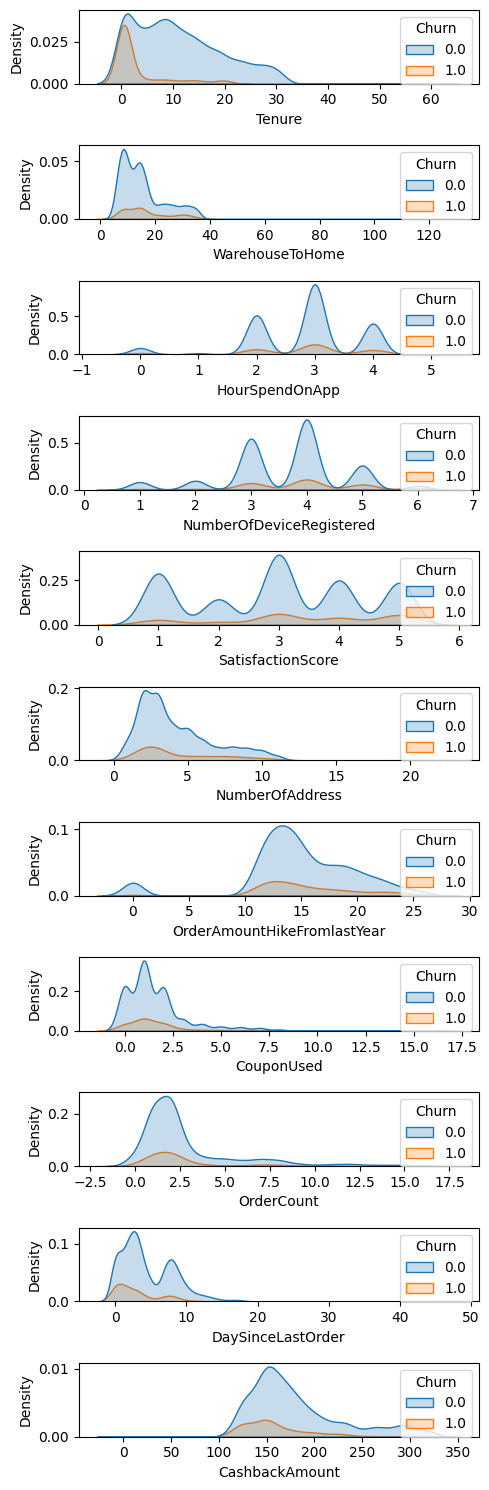

In [ ]:
cols = num_cols.columns[~num_cols.columns.isin(['CustomerID','Churn'])].tolist()

plt.figure(figsize=(5, 15))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.kdeplot(df_churn, x=col, hue='Churn', shade=True)

plt.tight_layout()
plt.show()

* _Tenure_ : Often right-skewed, with a long tail towards higher values. This indicates that many customers churn early, while a smaller percentage stays for a longer duration.

* _WarehouseToHome_ : Right-skewed distribution, with a peak around lower values. This suggests that a majority of customers have shorter distances between their warehouse and home.

* _HourSpendOnApp_ : Peaks around 2, 3 and 4 hours. This suggests that most users might spend a lot of time on the app.

* _NumberOfDeviceRegistered_ : Peak around average values. This indicates that most customers register multiple devices.

* _SatisfactionScore_ : Bimodal distribution, with peaks around 3. This suggests that there might be two distinct groups of customers: those with lower satisfaction and those with higher satisfaction.

* _NumberOfAddress_ : Right-skewed distribution. This suggests that a significant number of customers have fewer addresses, while a smaller portion has more.

* _OrderAmountHikeFromLastYear_ : Most customers have a significant increase in their order volume compared to last year. A few are new customers this year.

* _CouponUsed_ : Right-skewed distribution. This suggests that a majority of customers use fewer coupons, it might be that the company's coupon usage strategy is not very effective in driving customer purchases.

* _OrderCount_ : Majority of customers make fewer orders.

* _DaysSinceLastOrder_ : A significant number of customers have shorter intervals between orders, which might indicate that the company's products or services are not frequently repurchased by customers.

* _CashbackAmount_ : A right-skewed distribution might indicate that the company's cashback program is not very generous for most customers. A significant number of customers receive cashback amounts between \$100 and \$250.

**Category Values**

In [ ]:
obj_cols = df_churn.select_dtypes(include=['object'])
obj_cols.nunique()

,0
PreferredLoginDevice,2
CityTier,3
PreferredPaymentMode,5
Gender,2
PreferedOrderCat,5
MaritalStatus,3
Complain,2


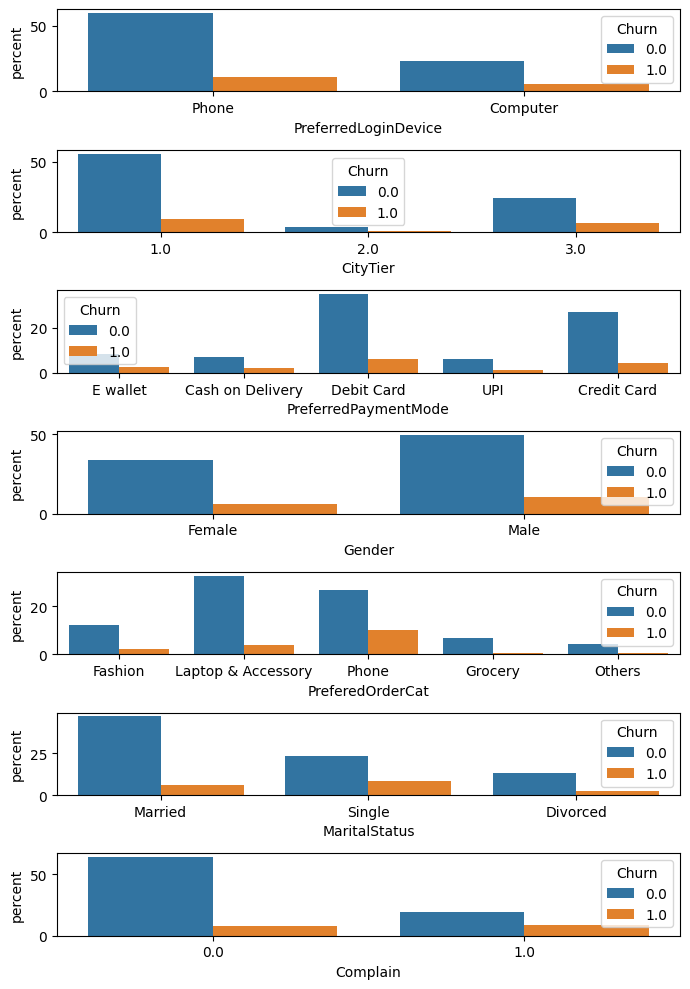

In [ ]:
obj_cols = df_churn.select_dtypes(include=['object'])
cols = obj_cols.columns.tolist()
plt.figure(figsize=(7, 10))

for i, col in enumerate(cols, 1):
  plt.subplot(len(cols), 1, i)
  sns.countplot(df_churn, x=col, hue='Churn', stat='percent')

plt.tight_layout()
plt.show()

* _PreferredLoginDevice_ : Majority of customers preferring to log in using their phones.

* _CityTier_ : Majority of customers residing in Tier 1 cities.

* _PreferredPaymentMode_ : Customers exhibit a variety of payment preferences, with card payments being the most popular choice.

* _Gender_ : Male customers constitute a larger proportion.

* _PreferedOrderCat_ : Laptop and Phone is the most popular category among customers.

* _MaritalStatus_ : Married individuals form a substantial portion of the company's customer base. However, single individuals exhibit the highest churn rate.

* _Complain_ : The majority of customers are not having any complaints. Churned customers, however, are equally divided between those with and without complaints.

**What are the patterns/behavior of churned users? What are your suggestions to the company to reduce churned users.**

* _Target Short-Tenure Customers_ : Offer special discounts, rewards, or loyalty points to encourage early commitment.

* _Encourage Digital Payments_ : Provide discounts or rewards for using digital payment methods. Streamline the digital payment process to make it convenient and secure.

* _Optimize Device Registration_ : Provide exclusive benefits or features to customers who register multiple devices.

* _Cater to Diverse Product Preferences_ : Offer a wider range of products, especially in categories like phone, laptop, and accessories. Implement effective strategies to encourage customers to purchase additional products.

* _Understand the Impact of Marital Status_ : Develop targeted marketing campaigns for single customers, focusing on their specific needs and preferences. Building community among single customers through online forums or social media groups.

* _Address Complaints Promptly and Effectively_ : Encourage customer feedback through surveys, reviews, or social media. Reach out to customers who have lodged complaints to offer solutions and improve their satisfaction.

## 1.4. Bivariate & Multivariate Analysis

<Axes: >

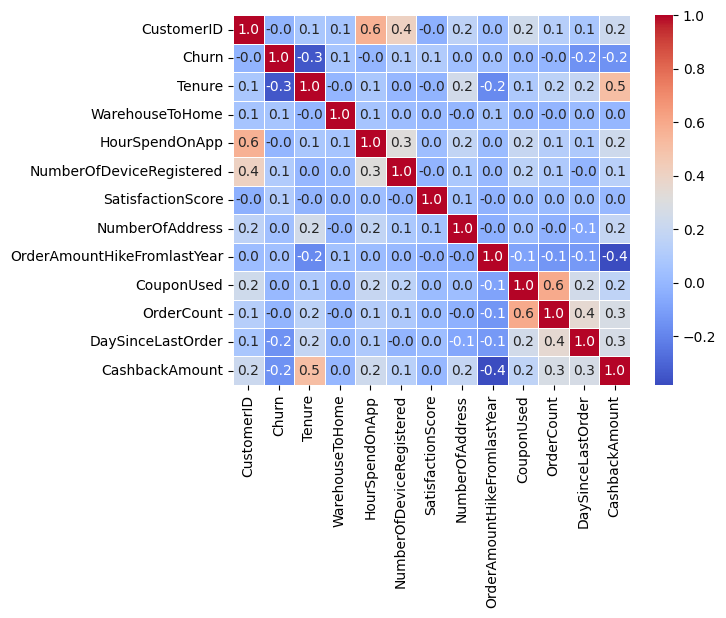

In [ ]:
corr = num_cols.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)

Negative correlation between "Tenure" and "Churn". This suggests that customers with longer tenure are less likely to churn.



## 1.5. Outlier Detection

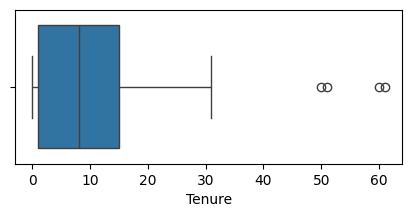

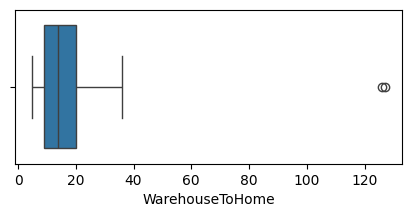

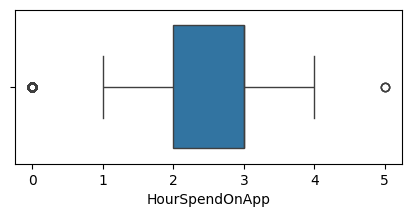

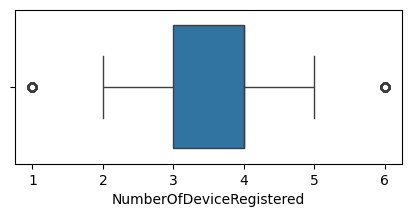

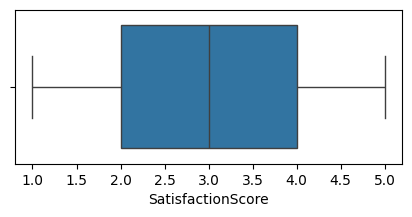

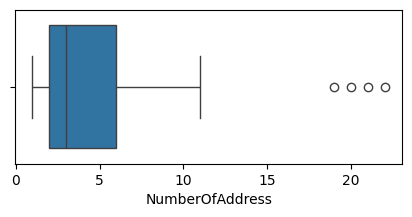

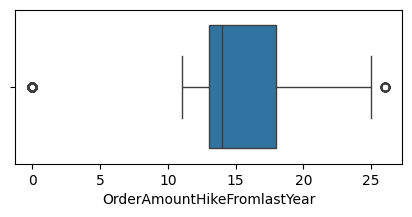

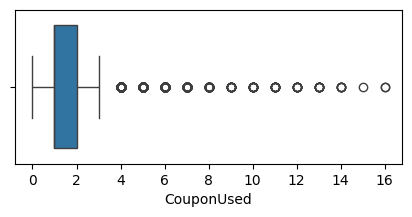

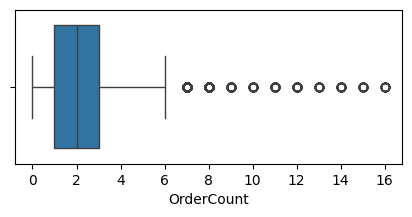

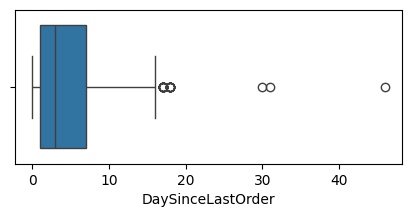

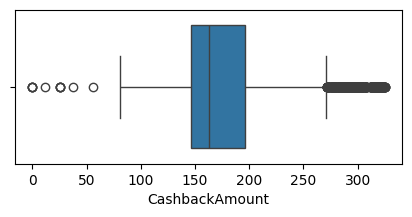

In [ ]:
cols = num_cols.columns[~num_cols.columns.isin(['CustomerID','Churn'])].tolist()

for col in cols:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df_churn[col])
    plt.show()

In [ ]:
df_churn = df_churn[(df_churn['Tenure'] <= 40) &
                    (df_churn['WarehouseToHome'] <= 120) &
                    (df_churn['NumberOfAddress'] <= 15) &
                    (df_churn['DaySinceLastOrder'] <= 20)].reset_index(drop=True)

## 1.6. Target Variable Analysis

In [ ]:
label_ratio = df_churn['Churn'].value_counts(normalize=True)
label_ratio

,proportion
Churn,
0.0,0.831761
1.0,0.168239


The ratio of label 1 on total is 16.8% (1-20%): **quite imbalanced** --> Still process ML model as normal. If the model doesn't as expect, we will return to handle imbalance by SMOTE or get more data.

# 2.&nbsp;Logistic Regression

## 2.1. Feature Transforming

In [ ]:
cate_columns = df_churn.loc[:, df_churn.dtypes == object].columns.tolist()

encoded_df = pd.get_dummies(df_churn, columns = cate_columns, drop_first=True)
encoded_df.shape

(5617, 28)

In [ ]:
# Split train/test sets
from sklearn.model_selection import train_test_split

x = encoded_df.drop(['Churn'], axis=1)
y = encoded_df['Churn']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of validate set: {len(x_val)}")
print(f"Number data of test set: {len(x_test)}")

Number data of train set: 3931
Number data of validate set: 843
Number data of test set: 843


In [ ]:
# Normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

## 2.2. Model Training

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       703
         1.0       0.86      0.56      0.68       140

    accuracy                           0.91       843
   macro avg       0.89      0.77      0.82       843
weighted avg       0.91      0.91      0.90       843



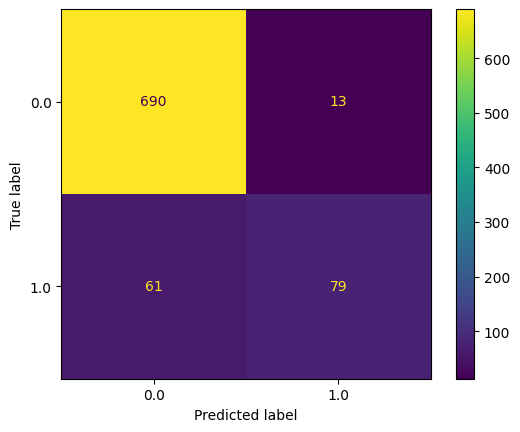

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

churn_logis = LogisticRegression(random_state=0)
churn_logis.fit(x_train_scaled, y_train)

y_pred_val = churn_logis.predict(x_val_scaled)
y_pred_train = churn_logis.predict(x_train_scaled)
y_pred_test = churn_logis.predict(x_test_scaled)

print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test, labels = churn_logis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = churn_logis.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       703
         1.0       0.96      0.77      0.86       140

    accuracy                           0.96       843
   macro avg       0.96      0.88      0.92       843
weighted avg       0.96      0.96      0.96       843



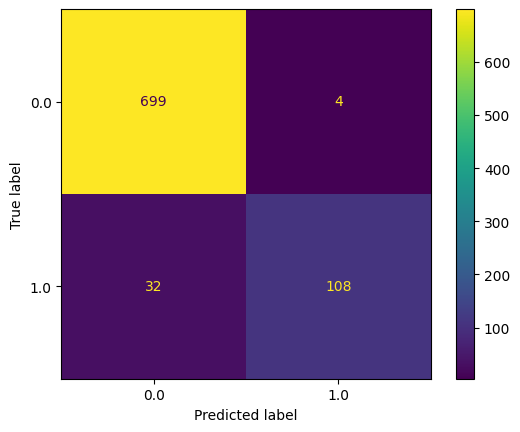

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

churn_rand = RandomForestClassifier(max_depth=15, random_state=0, n_estimators = 100)

churn_rand.fit(x_train_scaled, y_train)

y_ranf_pre_train = churn_rand.predict(x_train_scaled)
y_ranf_pre_val = churn_rand.predict(x_val_scaled)
y_pred = churn_rand.predict(x_test_scaled)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = churn_rand.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = churn_rand.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       703
         1.0       0.92      0.88      0.90       140

    accuracy                           0.97       843
   macro avg       0.95      0.93      0.94       843
weighted avg       0.97      0.97      0.97       843



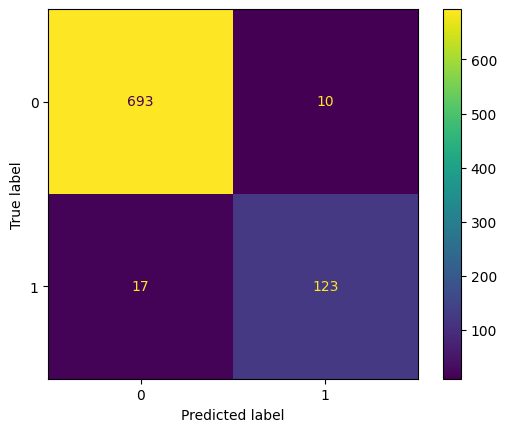

In [ ]:
# XGBOOST
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model_xgb = XGBClassifier(random_state=42, n_estimators=200)
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_xgb.classes_)
disp.plot()

## 2.3. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}
grid_search = GridSearchCV(model_xgb, param_grid, cv=5, scoring='balanced_accuracy')

grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test set accuracy:  0.9750889679715302


# 3.&nbsp;K-Means Clustering

Encoding

In [ ]:
df_clus = df_churn[df_churn['Churn'] == 1]
df_dummies = pd.get_dummies(df_clus, columns = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain'], drop_first=True)
df_dummies.head()

,CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Married,MaritalStatus_Single,Complain_1.0
7,53583.0,1.0,1.0,17.0,4.0,5.0,4.0,3.0,26.0,2.0,...,False,False,False,False,False,False,True,False,True,True
24,55053.0,1.0,1.0,17.0,4.0,5.0,4.0,3.0,26.0,1.0,...,False,False,False,False,False,False,True,False,True,True
40,50768.0,1.0,0.0,16.0,3.0,4.0,4.0,2.0,25.0,1.0,...,False,False,False,False,False,False,True,False,True,True
58,52238.0,1.0,0.0,16.0,3.0,4.0,4.0,2.0,25.0,0.0,...,False,False,False,False,False,False,True,False,True,True
68,52834.0,1.0,1.0,14.0,4.0,6.0,3.0,3.0,25.0,2.0,...,False,False,True,False,True,False,False,False,True,True


Dimension Reduction

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=3)
# pca.fit(df_dummies)
# PCA_ds = pd.DataFrame(pca.transform(df_dummies), columns=['PC1', 'PC2', 'PC3'])
# PCA_ds

,PC1,PC2,PC3
0,833.271998,-22.372377,1.240965
1,2303.239568,-32.057240,0.718180
2,-1981.832896,-28.899751,1.441866
3,-511.865326,-38.584613,0.919082
4,84.563669,24.568299,-1.803767
...,...,...,...
940,537.416441,154.669450,-11.915378
941,855.375303,147.435649,-10.895399
942,1457.413099,150.652842,-1.229929
943,2007.384693,145.033581,-12.489956


In [ ]:
# pca.explained_variance_ratio_

array([9.99437975e-01, 5.10704107e-04, 2.56682649e-05])

Choosing K

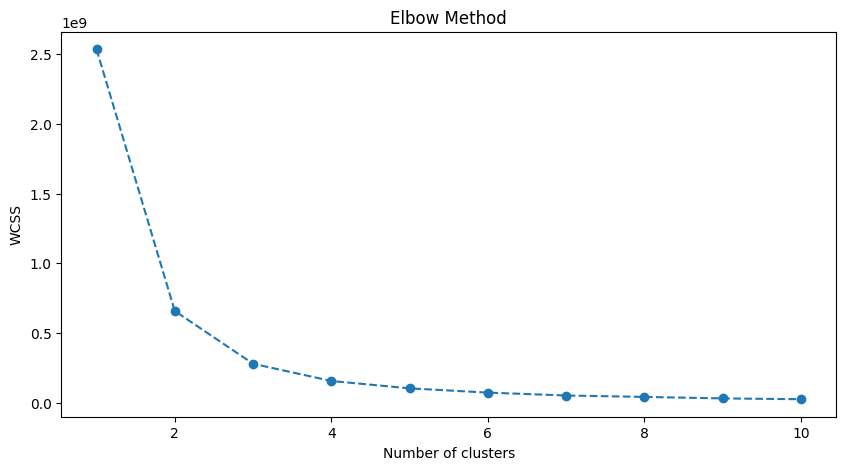

In [ ]:
from sklearn.cluster import KMeans

ss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_dummies)
    ss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, max_clusters+1), ss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Apply K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(df_dummies)

df_dummies['Cluster'] = predicted_labels
df_clus['Cluster'] = predicted_labels
df_clus

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
7,53583.0,1.0,1.0,Computer,1.0,17.0,Credit Card,Female,4.0,5.0,...,4.0,Single,3.0,1.0,26.0,2.0,2.0,1.0,144.0,0
24,55053.0,1.0,1.0,Computer,1.0,17.0,Credit Card,Female,4.0,5.0,...,4.0,Single,3.0,1.0,26.0,1.0,2.0,1.0,144.0,2
40,50768.0,1.0,0.0,Computer,1.0,16.0,Credit Card,Female,3.0,4.0,...,4.0,Single,2.0,1.0,25.0,1.0,1.0,0.0,119.0,1
58,52238.0,1.0,0.0,Computer,1.0,16.0,Credit Card,Female,3.0,4.0,...,4.0,Single,2.0,1.0,25.0,0.0,1.0,0.0,119.0,0
68,52834.0,1.0,1.0,Computer,1.0,14.0,Debit Card,Male,4.0,6.0,...,3.0,Single,3.0,1.0,25.0,2.0,2.0,7.0,186.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,53286.0,1.0,21.0,Phone,1.0,9.0,Debit Card,Male,3.0,4.0,...,4.0,Single,9.0,1.0,0.0,6.0,14.0,9.0,317.0,0
5482,53604.0,1.0,9.0,Phone,3.0,9.0,E wallet,Female,4.0,6.0,...,4.0,Single,4.0,1.0,0.0,1.0,2.0,12.0,313.0,0
5519,54206.0,1.0,5.0,Phone,1.0,19.0,Cash on Delivery,Female,3.0,4.0,...,3.0,Married,3.0,0.0,0.0,2.0,16.0,9.0,320.0,2
5559,54756.0,1.0,21.0,Phone,1.0,9.0,Debit Card,Male,3.0,4.0,...,4.0,Single,9.0,1.0,0.0,8.0,14.0,9.0,317.0,2


Evaluating Model

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_dummies, predicted_labels)
print(sil_score)

0.5932233811690528


Distribution of clusters

In [ ]:
df_clus['Cluster'].value_counts()

,count
Cluster,
0,340
1,313
2,292


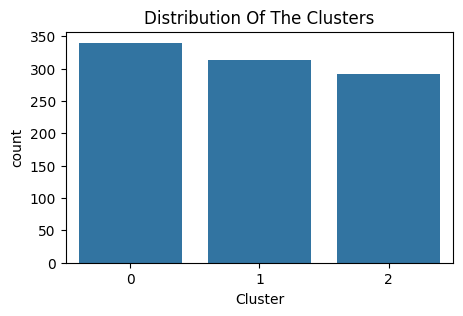

In [ ]:
pl = sns.countplot(x=df_clus['Cluster'])
pl.figure.set_size_inches(5, 3)
pl.set_title("Distribution Of The Clusters")
plt.show()

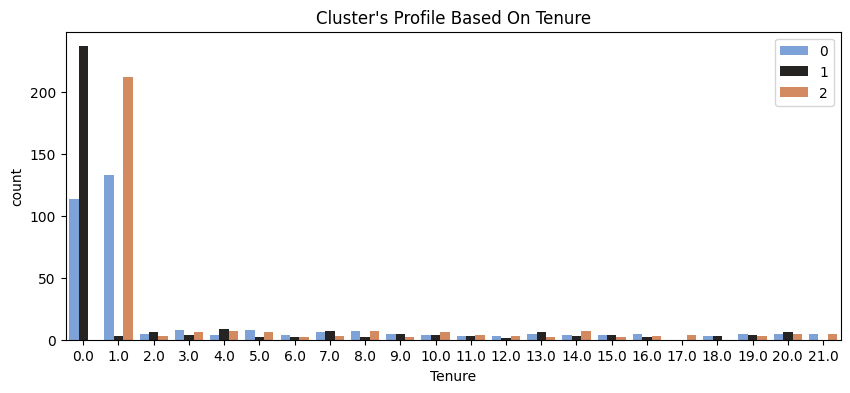

In [ ]:
color_bar = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

pl = sns.countplot(data = df_clus , x = df_clus['Tenure'] , hue = df_clus['Cluster'], palette = color_bar)
pl.figure.set_size_inches(10, 4)
pl.set_title("Cluster's Profile Based On Tenure")
plt.legend()
plt.show()

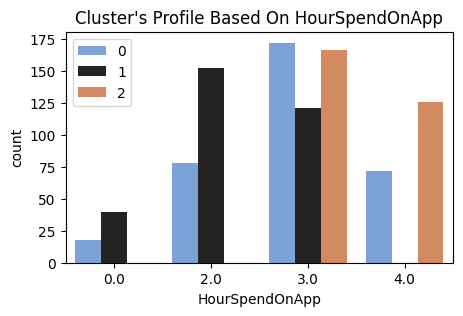

In [ ]:
color_bar = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

pl = sns.countplot(data = df_clus , x = df_clus['HourSpendOnApp'] , hue = df_clus['Cluster'], palette = color_bar)
pl.figure.set_size_inches(5, 3)
pl.set_title("Cluster's Profile Based On HourSpendOnApp")
plt.legend()
plt.show()

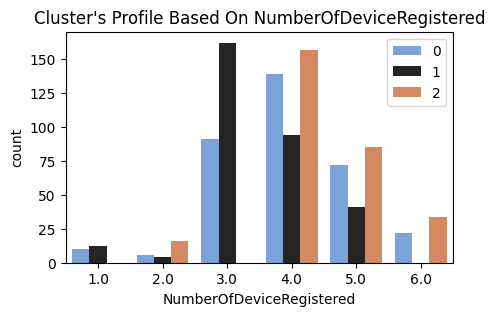

In [ ]:
color_bar = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

pl = sns.countplot(data = df_clus , x = df_clus['NumberOfDeviceRegistered'] , hue = df_clus['Cluster'], palette = color_bar)
pl.figure.set_size_inches(5, 3)
pl.set_title("Cluster's Profile Based On NumberOfDeviceRegistered")
plt.legend()
plt.show()

In [ ]:
cluster_means = df_clus[['Cluster', 'Tenure', 'DaySinceLastOrder', 'CashbackAmount']].groupby('Cluster').mean()
cluster_means

,Tenure,DaySinceLastOrder,CashbackAmount
Cluster,,,
0,3.276471,3.126471,161.717647
1,2.370607,2.693291,147.613419
2,3.674658,3.219178,172.486301
